In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
cardio = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv",delimiter = ';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardio.shape

(70000, 13)

In [5]:
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
cardio.duplicated().sum()

0

<Axes: >

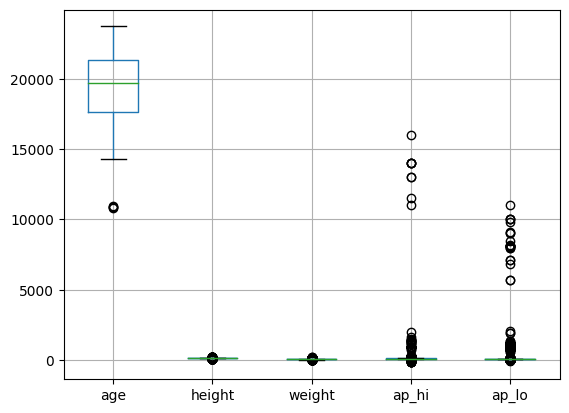

In [7]:
cardio[["age","height","weight","ap_hi","ap_lo"]].boxplot()

In [8]:
#convert ages from days to years
cardio["age"]=(cardio["age"]/365).values.astype(float)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


Feature Reduction

In [9]:
#feature reduction: insted of age and height we can put BMI value
#for BMI height--> must meter and weight-->Kg

#convert height to meters
cardio["height"]=(cardio["height"]/100)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,1.56,56.0,100,60,1,1,0,0,0,0


In [10]:
#add BMI column
cardio["bmi"]=cardio["weight"]/((cardio["height"])**2)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.391781,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


In [11]:
cardio.drop(["id","height","weight"],axis=1,inplace=True)
cardio.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,100,60,1,1,0,0,0,0,23.011177


<Axes: >

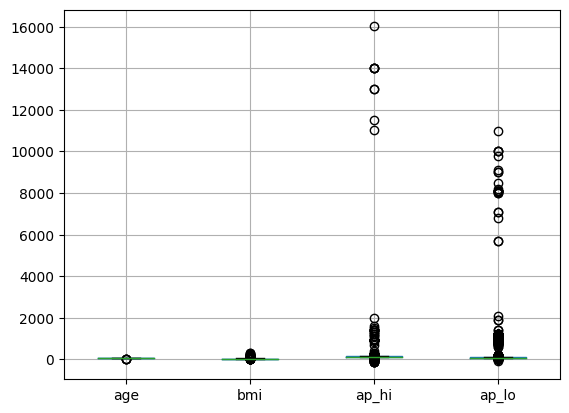

In [12]:
#plot numerical vlaues
numeric_data=cardio[["age","bmi","ap_hi","ap_lo"]]
numeric_data.boxplot()

Outlier Cleaning

In [13]:
#there are more outliers in the ap_hi ans ap_lo columns
#we have to remove outliers
#we use 1.5 IQR method to data cleaning

Q1=numeric_data.quantile(0.25)
Q3=numeric_data.quantile(0.75)

IQR=Q3-Q1
IQR

age      10.035616
bmi       6.347107
ap_hi    20.000000
ap_lo    10.000000
dtype: float64

In [14]:
((numeric_data<(Q1-1.5*IQR)) | (numeric_data>(Q3+1.5*IQR)))
#True means outliers

,age,bmi,ap_hi,ap_lo
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,True
...,...,...,...,...
69995,False,False,False,False
69996,False,True,False,False
69997,False,False,True,False
69998,False,False,False,False


In [15]:
#get outliers rows
out_row=((numeric_data<(Q1-1.5*IQR)) | (numeric_data>(Q3+1.5*IQR))).any(axis=1)


In [16]:
#remove outliers from original dataset
#cardio=cardio[~out_row]

In [17]:
#outlier free dataframe
cardio.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,100,60,1,1,0,0,0,0,23.011177


<Axes: >

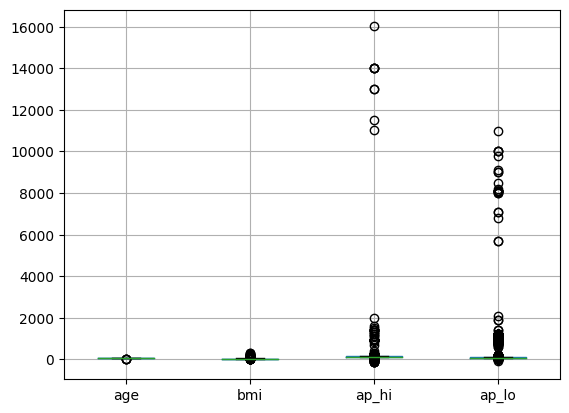

In [18]:
#plot numerical vlaues
numeric_data=cardio[["age","bmi","ap_hi","ap_lo"]]
numeric_data.boxplot()

In [19]:
cardio.shape

(70000, 11)

In [20]:
numeric_data.describe()

,age,bmi,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,27.556513,128.817286,96.630414
std,6.759594,6.091511,154.011419,188.472530
min,29.583562,3.471784,-150.000000,-70.000000
25%,48.394521,23.875115,120.000000,80.000000
50%,53.980822,26.374068,120.000000,80.000000
75%,58.430137,30.222222,140.000000,90.000000
max,64.967123,298.666667,16020.000000,11000.000000


In [21]:
#check wheater data set is balance or imbalance
cardio["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

Visualization

<Axes: xlabel='cardio'>

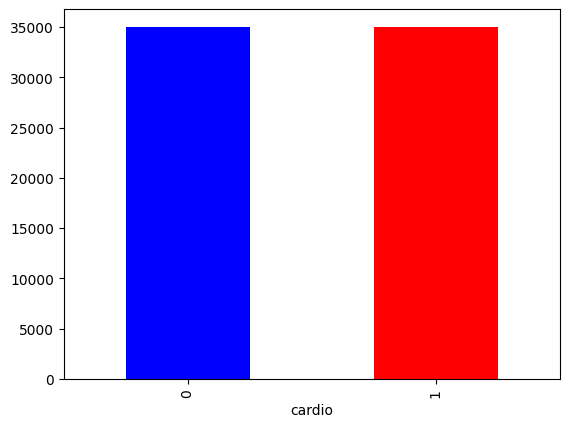

In [22]:
cardio["cardio"].value_counts().plot(kind='bar',color=['blue','red'])

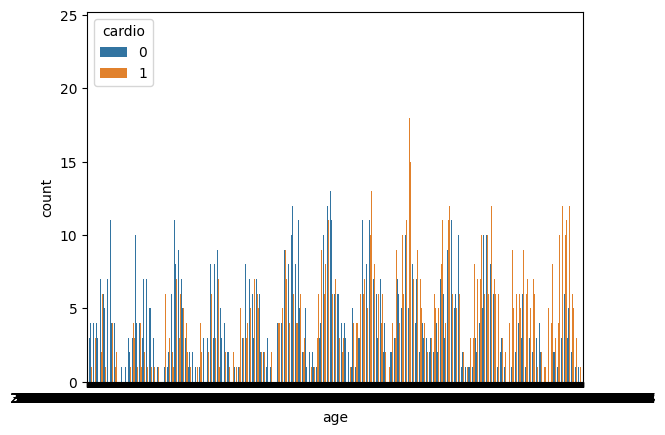

In [23]:
#plot cardio count with age
sns.countplot(data=cardio,x="age",hue="cardio")
plt.show()

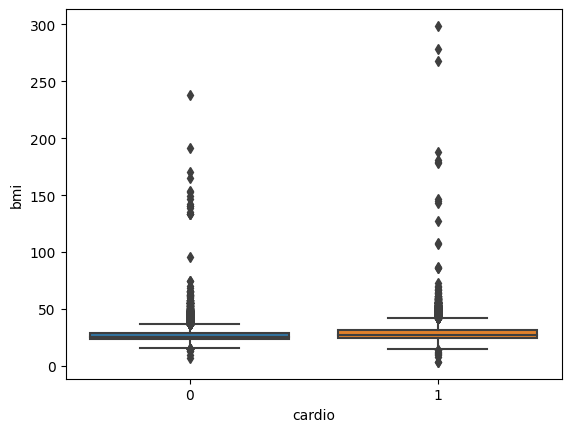

In [24]:
#get plot about bmi and cardio in cardio table

sns.boxplot(data=cardio,x="cardio",y="bmi")
plt.show()


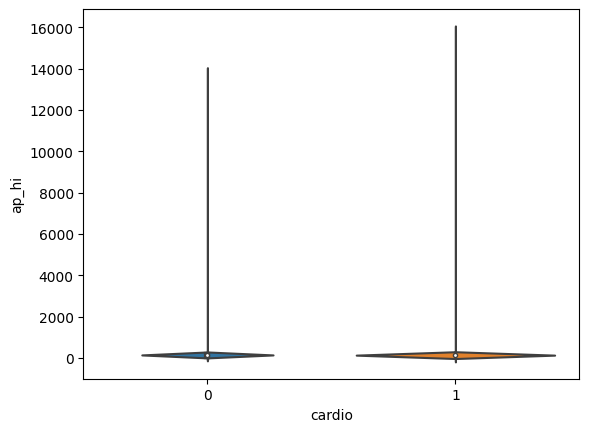

In [25]:
# plot ap_hi with cardio
sns.violinplot(data=cardio, x="cardio", y="ap_hi")
plt.show()

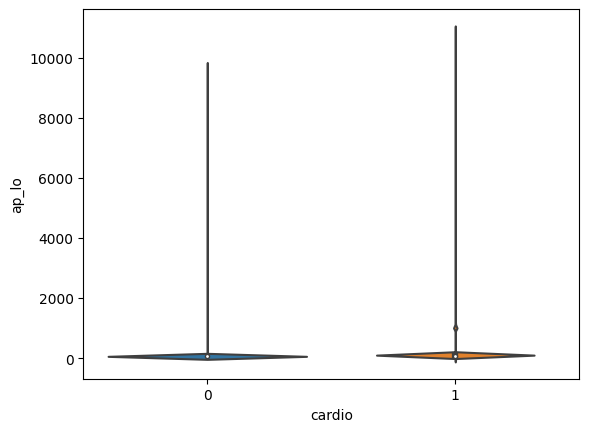

In [26]:
#plot cardio count with ap_lo
sns.violinplot(data=cardio, x="cardio", y="ap_lo")
plt.show()

In [27]:
numeric_data.head()

,age,bmi,ap_hi,ap_lo
0,50.391781,21.967120,110,80
1,55.419178,34.927679,140,90
2,51.663014,23.507805,130,70
3,48.282192,28.710479,150,100
4,47.873973,23.011177,100,60


<Axes: >

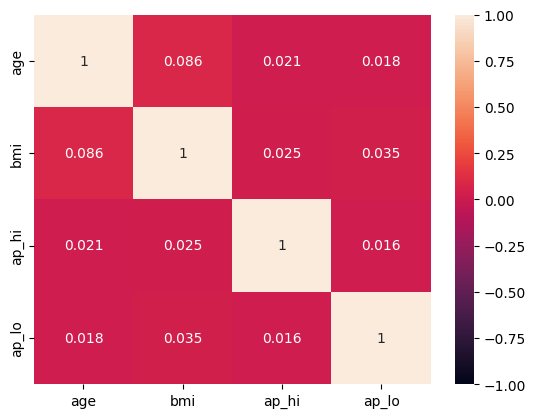

In [28]:
#check corelation
sns.heatmap(numeric_data.corr(),annot=True,vmin=-1,vmax=+1)

/tmp/ipykernel_19/2459901083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cardio"]=["Yes" if m==1 else "No" for m in cardio["cardio"]]


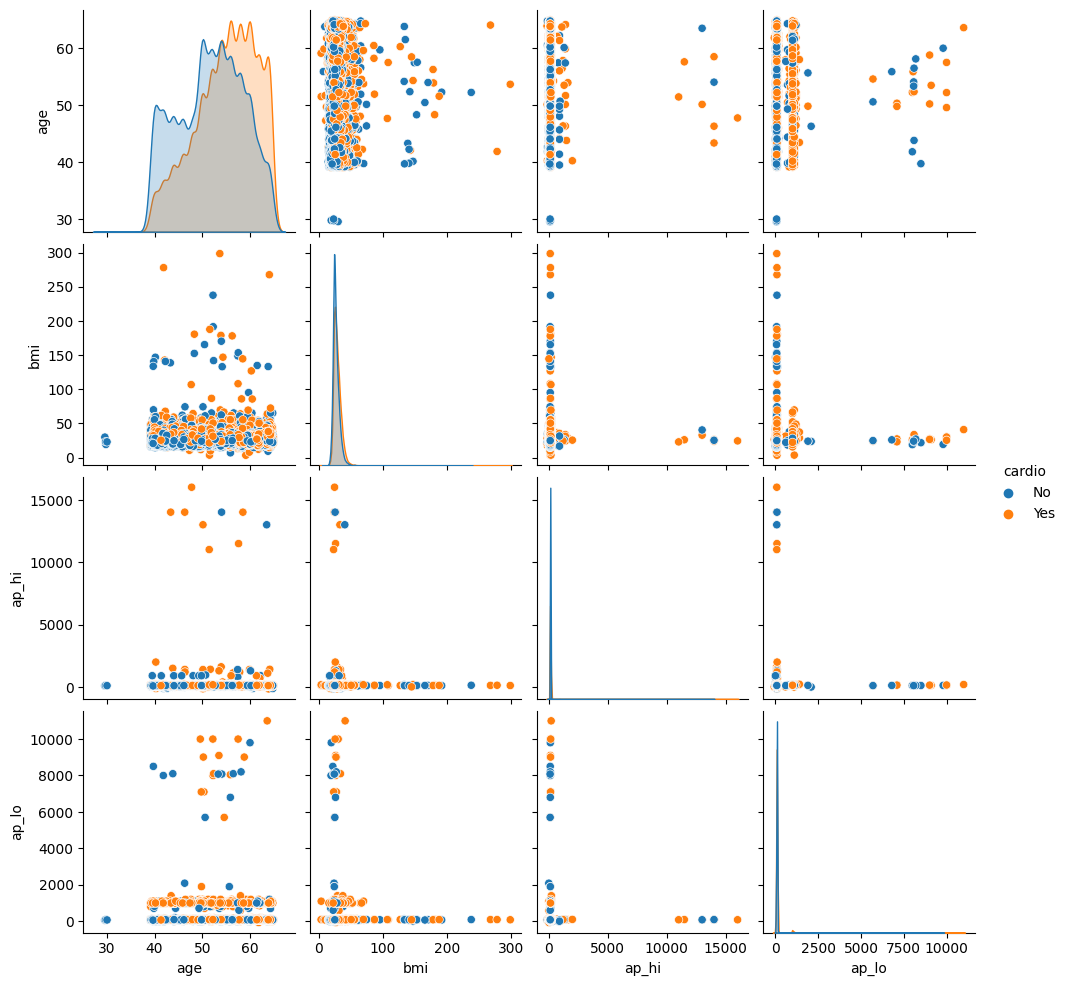

In [29]:
#plot pairplots with cardio

df=numeric_data
df["cardio"]=["Yes" if m==1 else "No" for m in cardio["cardio"]]
sns.pairplot(df,hue="cardio")
plt.show()

Reindex columns

In [30]:
cardio=cardio.reindex(columns=["age","ap_hi","ap_lo","bmi","gender","cholesterol","gluc","smoke","alco","active","cardio"])
cardio.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,110,80,21.967120,2,1,1,0,0,1,0
1,55.419178,140,90,34.927679,1,3,1,0,0,1,1
2,51.663014,130,70,23.507805,1,3,1,0,0,0,1
3,48.282192,150,100,28.710479,2,1,1,0,0,1,1
4,47.873973,100,60,23.011177,1,1,1,0,0,0,0


data encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()
cardio["gender"]=le.fit_transform(cardio["gender"])
cardio.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,110,80,21.967120,1,1,1,0,0,1,0
1,55.419178,140,90,34.927679,0,3,1,0,0,1,1
2,51.663014,130,70,23.507805,0,3,1,0,0,0,1
3,48.282192,150,100,28.710479,1,1,1,0,0,1,1
4,47.873973,100,60,23.011177,0,1,1,0,0,0,0


In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [34]:
one_hotE1=ohe.fit_transform(cardio["cholesterol"].values.reshape(len(cardio["cholesterol"]),1)).toarray()
one_hotE1=one_hotE1[:,1:].astype(int) #since there are 3 features we can remove one and conver values into integers

print(one_hotE1.shape)
#create a dataframe by including encoded arrays
df_ohot1=pd.DataFrame(one_hotE1,columns=["above normal chol","well above normal chol"])

df_ohot1.head()

(70000, 2)


,above normal chol,well above normal chol
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0


In [35]:
#for gluc
#for fit it needs 2D array. thats why reshape needs
one_hotE2=ohe.fit_transform(cardio["gluc"].values.reshape(len(cardio["gluc"]),1)).toarray()
one_hotE2=one_hotE2[:,1:].astype(int) #since there are 3 features we can remove one and conver values into integers

print(one_hotE2.shape)
#create a dataframe by including encoded arrays
df_ohot2=pd.DataFrame(one_hotE2,columns=["above normal gluc","well above normal gluc"])

df_ohot2.head()

(70000, 2)


,above normal gluc,well above normal gluc
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [36]:
#Reset data index
#when we doing clearance some data rows removed. so some indexing are missing. if we concat like this there may have some misiing

cardio.reset_index(inplace=True)
cardio.drop("index",axis=1,inplace=True)
cardio.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,110,80,21.967120,1,1,1,0,0,1,0
1,55.419178,140,90,34.927679,0,3,1,0,0,1,1
2,51.663014,130,70,23.507805,0,3,1,0,0,0,1
3,48.282192,150,100,28.710479,1,1,1,0,0,1,1
4,47.873973,100,60,23.011177,0,1,1,0,0,0,0


In [37]:
df=pd.concat([cardio.iloc[:,:10],df_ohot1,df_ohot2],axis=1)
df.drop(["cholesterol","gluc"],axis=1,inplace=True)
df.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,active,above normal chol,well above normal chol,above normal gluc,well above normal gluc
0,50.391781,110,80,21.967120,1,0,0,1,0,0,0,0
1,55.419178,140,90,34.927679,0,0,0,1,0,1,0,0
2,51.663014,130,70,23.507805,0,0,0,0,0,1,0,0
3,48.282192,150,100,28.710479,1,0,0,1,0,0,0,0
4,47.873973,100,60,23.011177,0,0,0,0,0,0,0,0


Standerize the values

In [38]:
x=df.values
y=cardio.iloc[:,8].values

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[:,:4]=sc.fit_transform(x[:,:4])
x[:,:4]

array([[-0.43606151, -0.12218198, -0.0882385 , -0.91757729],
       [ 0.30768633,  0.07261016, -0.03517999,  1.21008057],
       [-0.24799666,  0.00767945, -0.14129701, -0.66465218],
       ...,
       [-0.16328642,  0.33233302, -0.03517999,  0.62334178],
       [ 1.20058905,  0.04014481, -0.0882385 , -0.07506591],
       [ 0.43414373, -0.05725127, -0.0882385 , -0.4338885 ]])

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Use voting class clasifier

In [40]:
#create model objects
model1_lr = LogisticRegression(C=1.0, solver='lbfgs')
model2_svm = SVC(kernel="rbf",C=1.0, gamma='scale')
model3_dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
model4_rf = RandomForestClassifier(n_estimators=500, max_features='sqrt')
model5_gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
model6_knn = KNeighborsClassifier(n_neighbors=50,metric='minkowski')


In [41]:
T1=("lr",model1_lr)
T2=("svm",model2_svm)
T3=("dt",model3_dt)
T4=("rf",model4_rf)
T5=("gb",model5_gb)
T6=("knn",model6_knn)

In [42]:
model1_lr.fit(x_train,y_train)
y1_pred_lr=model1_lr.predict(x_test)
print(accuracy_score(y_test,y1_pred_lr))
print(classification_report(y_test,y1_pred_lr))
print(confusion_matrix(y_test,y1_pred_lr))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13270
           1       1.00      1.00      1.00       730

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[[13270     0]
 [    0   730]]


In [43]:
model2_svm.fit(x_train,y_train)
y2_pred_svm = model2_svm.predict(x_test)
print(accuracy_score(y_test,y2_pred_svm))
print(classification_report(y_test,y2_pred_svm))
print(confusion_matrix(y_test,y2_pred_svm))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13270
           1       1.00      1.00      1.00       730

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[[13270     0]
 [    0   730]]


In [44]:
model3_dt.fit(x_train,y_train)
y3_pred_dt = model3_dt.predict(x_test)
print(accuracy_score(y_test,y3_pred_dt))
print(classification_report(y_test,y3_pred_dt))
print(confusion_matrix(y_test,y3_pred_dt))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13270
           1       1.00      1.00      1.00       730

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[[13270     0]
 [    0   730]]


In [45]:
model4_rf.fit(x_train,y_train)
y4_pred_rf = model4_rf.predict(x_test)
print(accuracy_score(y_test,y4_pred_rf))
print(classification_report(y_test,y4_pred_rf))
print(confusion_matrix(y_test,y4_pred_rf))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13270
           1       1.00      1.00      1.00       730

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[[13270     0]
 [    0   730]]


In [46]:
model5_gb.fit(x_train,y_train)
y5_pred_gb = model5_gb.predict(x_test)
print(accuracy_score(y_test,y5_pred_gb))
print(classification_report(y_test,y5_pred_gb))
print(confusion_matrix(y_test,y5_pred_gb))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13270
           1       1.00      1.00      1.00       730

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[[13270     0]
 [    0   730]]


In [47]:
model6_knn.fit(x_train,y_train)
y6_pred_knn = model6_knn.predict(x_test)
print(accuracy_score(y_test,y6_pred_knn))
print(classification_report(y_test,y6_pred_knn))
print(confusion_matrix(y_test,y6_pred_knn))

0.9897142857142858
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13270
           1       1.00      0.80      0.89       730

    accuracy                           0.99     14000
   macro avg       0.99      0.90      0.94     14000
weighted avg       0.99      0.99      0.99     14000

[[13270     0]
 [  144   586]]


In [48]:
model=VotingClassifier(estimators=[T1,T2,T3,T4,T5,T6],voting="hard")
model.fit(x_train,y_train)
y_predict_vc = model.predict(x_test)
print(accuracy_score(y_test,y_predict_vc))
print(classification_report(y_test,y_predict_vc))
print(confusion_matrix(y_test,y_predict_vc))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13270
           1       1.00      1.00      1.00       730

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[[13270     0]
 [    0   730]]
